In [1]:
from dike_model_function import DikeNetwork
from problem_formulation import get_model_for_problem_formulation
from ema_workbench.analysis import prim
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ema_workbench import MultiprocessingEvaluator, ema_logging
import pickle

C:\Users\Marnix Verhagen\Anaconda\lib\site-packages\ema_workbench\analysis\prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(


In [2]:
model, _ = get_model_for_problem_formulation(2)

In [3]:
from ema_workbench import Samplers

ema_logging.log_to_stderr(ema_logging.INFO)

n_scenarios = 10000 #In assignment 5 is at first 1000 used and later on for the dimensional stacking 10000. 
n_policies = 10 #Not sure if we have to go for 8 again here like in the earlier exploratory modeling

use_pickle1 = False 
if use_pickle1:
    with open('data/PRIM_results1.pickle','rb') as filehandler:
        results = pickle.load(filehandler)
else:
    with MultiprocessingEvaluator(model,n_processes=10) as evaluator:
        results = evaluator.perform_experiments(n_scenarios, n_policies, uncertainty_sampling=Samplers.LHS)
    
    with open('data/PRIM_results1.pickle',"wb") as filehandler:
        pickle.dump(results,filehandler)

In [4]:
experiments, outcomes = results

In [5]:
cleaned_experiments = experiments.drop(['policy','scenario','model'],axis=1)
# we drop 3 columns here

In [6]:
import numpy as np

data = outcomes['Expected Number of Deaths']
y = data < np.percentile(data,50) #Not sure which percentile we need to use
###!!! Ook jan kwakkel heeft bij zijn analyse een y met true/false gemaakt
###!!! Maar waarom ziet de prim grafiek er als een bijna rechte lijn uit

In [7]:
y

array([ True,  True,  True, ...,  True,  True,  True])

In [8]:
y.sum()


6800

In [9]:
#threshold (float) – the density threshold that a box has to meet
#Not sure which tresholds we need to use?
prim_alg = prim.Prim(cleaned_experiments,y, threshold=0.8, peel_alpha=0.05) 
box1 = prim_alg.find_box()

[MainProcess/INFO] 8000 points remaining, containing 6800 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.380625, coverage: 0.44779411764705884, density: 1.0 restricted_dimensions: 6


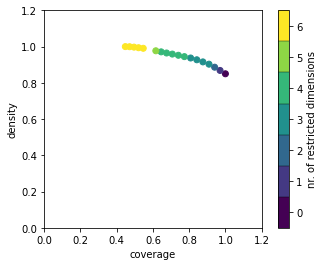

In [10]:
box1.show_tradeoff()
plt.show()

coverage     0.447794
density      1.000000
id          17.000000
mass         0.380625
mean         1.000000
res_dim      6.000000
Name: 17, dtype: float64

                      box 17                                           
                         min        max                       qp values
A.2_pfail           0.245857   0.999188   [8.585250729381748e-59, -1.0]
A.3_pfail           0.181951   0.999562  [1.5227795855558562e-38, -1.0]
A.5_pfail           0.115066   0.999701   [1.862076953265434e-35, -1.0]
A.1_DikeIncrease 0  1.500000  10.000000   [2.993604049721507e-20, -1.0]
A.1_pfail           0.134873   0.999242   [3.857923298795756e-17, -1.0]
A.4_pfail           0.100232   0.999146   [4.056629467585959e-12, -1.0]



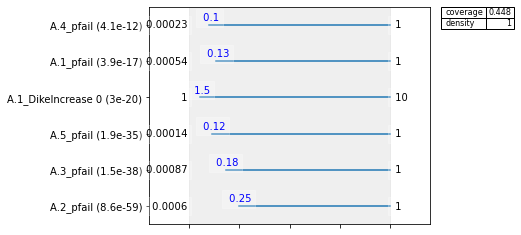

In [11]:
box1.inspect()
box1.inspect(style='graph')
plt.show()

In [12]:
from ema_workbench.analysis import dimensional_stacking

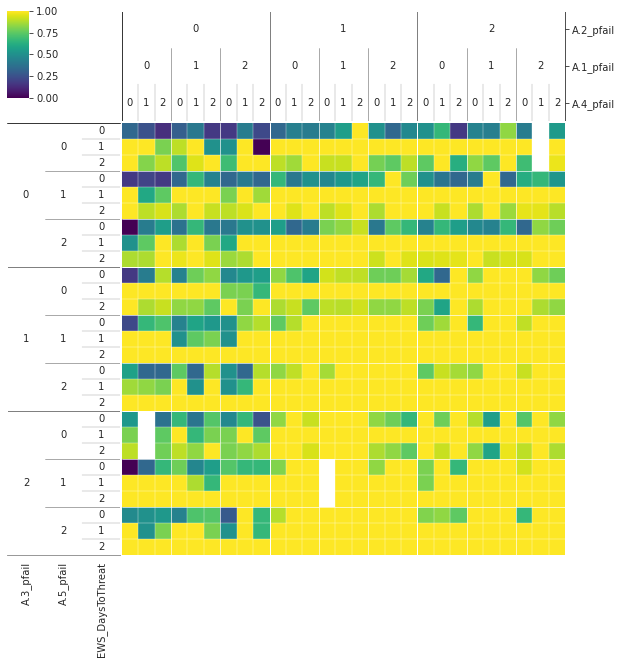

In [13]:
dimensional_stacking.create_pivot_plot(cleaned_experiments, y)
plt.show()